kaggle link
https://www.kaggle.com/datasets/denkuznetz/traffic-accident-prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2> loading data in </h2>

In [3]:
data = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [4]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


<h2> Processing data</h2>

working out total null values within each column

In [5]:
for column in data.columns:
    print(f"{column} total null values: {sum(data[column].isnull())}")

Weather total null values: 42
Road_Type total null values: 42
Time_of_Day total null values: 42
Traffic_Density total null values: 42
Speed_Limit total null values: 42
Number_of_Vehicles total null values: 42
Driver_Alcohol total null values: 42
Accident_Severity total null values: 42
Road_Condition total null values: 42
Vehicle_Type total null values: 42
Driver_Age total null values: 42
Driver_Experience total null values: 42
Road_Light_Condition total null values: 42
Accident total null values: 42


removing null values

In [6]:
data = data.dropna()

In [7]:
#converting columns into a integer and not a float
data['Driver_Age'] = data['Driver_Age'].astype(int)
data['Number_of_Vehicles'] = data['Number_of_Vehicles'].astype(int)
data['Driver_Experience'] = data['Driver_Experience'].astype(int)
data['Driver_Alcohol'] = data['Driver_Alcohol'].astype(int)
data['Traffic_Density'] = data['Traffic_Density'].astype(int)
data['Accident'] = data['Accident'].astype(int)

In [8]:
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1,60.0,4,0,Low,Icy,Car,54,52,Artificial Light,0
3,Clear,City Road,Afternoon,2,60.0,3,0,Low,Under Construction,Bus,34,31,Daylight,0
4,Rainy,Highway,Morning,1,195.0,11,0,Low,Dry,Car,62,55,Artificial Light,1
6,Foggy,Highway,Afternoon,0,60.0,4,0,Low,Dry,Truck,27,26,Daylight,1
7,Rainy,City Road,Afternoon,0,60.0,4,0,Low,Dry,Car,29,22,Artificial Light,1


<h2> data visualisation/understanding</h2>

([<matplotlib.patches.Wedge at 0x1b01bbf8e90>,
 [Text(0.22452801713650253, 1.0768412926335758, 'Clear'),
  Text(-0.9867957772164, -0.4860391898477749, 'Rainy'),
  Text(0.18260403626605964, -1.0847376484382496, 'Foggy'),
  Text(0.8797809128788396, -0.6602920151978788, 'Snowy'),
  Text(1.0880745651143067, -0.16153557116410247, 'Stormy')],
 [Text(0.12246982752900136, 0.5873679778001322, '43.5%'),
  Text(-0.5382522421180362, -0.26511228537151355, '27.7%'),
  Text(0.09960220159966889, -0.5916750809663179, '13.1%'),
  Text(0.47988049793391246, -0.3601592810170248, '11.1%'),
  Text(0.5934952173350763, -0.0881103115440559, '4.7%')])

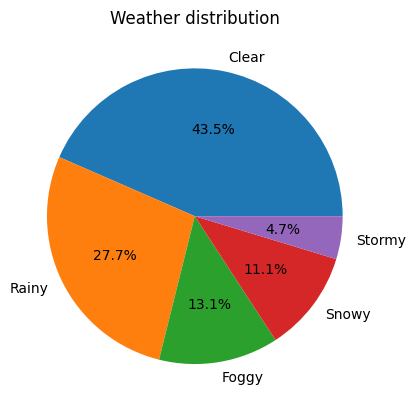

In [33]:
#working out the proportion of each type of condiction

fig,ax = plt.subplots()

wordList = ["Clear","Rainy","Foggy","Snowy","Stormy"]

totalWordArr = np.array([]).astype(int)

for word in wordList:
    totalWordArr = np.append(totalWordArr,sum((data['Weather'] == word) == True))
    #print(f"Total amount of rows for {word} {sum((data['Weather'] == word) == True)}")


plt.title("Weather distribution")
ax.pie(totalWordArr, labels=wordList, autopct="%1.1f%%")

<BarContainer object of 405 artists>

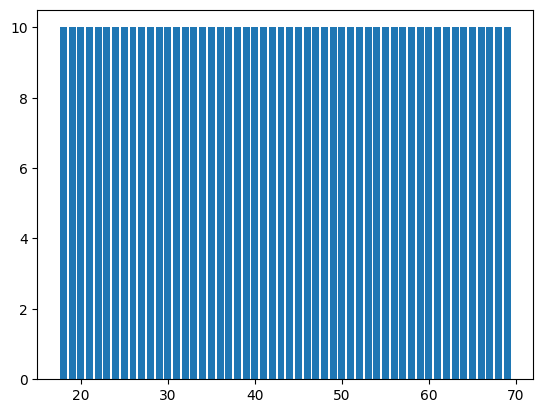

In [10]:
#looking at the distribution for age

age = data['Driver_Age']
barHeight = 10

plt.bar(age,barHeight)


In [11]:
print(data["Driver_Age"].describe)

<bound method NDFrame.describe of 2      54
3      34
4      62
6      27
7      29
       ..
830    56
835    23
836    52
838    25
839    29
Name: Driver_Age, Length: 405, dtype: int64>
